In [5]:
import csv
import numpy as np
import keras
import datetime

print("%s start" % datetime.datetime.today())
###
# 1.データ準備
###
print("initializing...")
n = 8500              # 入力層の要素数(=データの最大文字数)
k = 3                 # 出力層の要素数(いくつに分類するか)

max_rows = 10000  # 読み取り行数最大
train_ratio = 0.9 # 読み取ったデータのうち学習に使う比率
train_rows = int(max_rows * train_ratio) # 学習に使うデータの行数
test_rows = max_rows - train_rows
print("max_rows=%s" % max_rows)
print("train_rows=%s" % train_rows)

print("reading data..")
# numpy.appendは遅いので先にlistに取り込んでからnumpyに展開
xlist=[]
ylist=[]
with open('reviews-ccnn-train-data04.txt', 'r') as f:
    reader = csv.reader(f,delimiter = '\t')
#    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for i,row in enumerate(reader):
        if i >= max_rows:
            break
#        print(i,row[0],row[1])          # 1行づつ取得できる
        if (i+1) % 10000 == 0:
            print("%s rows read .. %s" % (i+1,datetime.datetime.today()))
        x=[]
        for c in row[1]:
            x.append(float(np.int.from_bytes(c.encode('utf-8'),'big')))
        xx = np.array(x)
        xx.resize(n,refcheck=False)
        xx = xx.astype('float32')
        y = float(row[0])
        xlist.append(xx)
        ylist.append(y)

print("total %s rows read" % (i) )

X=np.zeros((len(xlist),n),float) # 学習用入力データの行列
Y=np.zeros((len(ylist),k),float)  # 学習用出力データの行列
X_test=np.zeros((len(xlist),n),float) # 評価用入力データの行列
Y_test=np.zeros((len(ylist),k),float) # 評価用出力データの行列
train_index = 0
test_index = 0
for i in range(len(xlist)):
    x = xlist[i]
    y = ylist[i]
#    n_sub_samples = len(x.shape[0]
    # 上位train_rows分を学習データ　それ以外を評価データに使う
    # ホントはシャッフルしたほうがいい
    if i < train_rows:
        X[i:i+1,:] = x
        Y[i:i+1,:] = keras.utils.np_utils.to_categorical(y, k)
    else:
        X_test[i-train_rows:i-train_rows+1,:] = x
        Y_test[i-train_rows:i-train_rows+1,:] = keras.utils.np_utils.to_categorical(y, k)

X.resize((train_rows,n))
Y.resize((train_rows,k))
X_test.resize((test_rows,n))
Y_test.resize((test_rows,k))

# Xを３次元の行列に変換。この意味はわからない・・Kerasの都合か。
X=X.reshape(X.shape[0],n,1)
X_test=X_test.reshape(X_test.shape[0],n,1)
# 正規化
X /= 0x1FFFFF
X_test /= 0x1FFFFF

print("%s initialized" % datetime.datetime.today())



2018-02-15 01:07:48.961056 start
initializing...
max_rows=10000
train_rows=9000
reading data..
10000 rows read .. 2018-02-15 01:07:56.893443
total 10000 rows read
2018-02-15 01:07:57.652394 initialized


In [6]:
# 学習データの件数確認
X_test.shape


(1000, 8500, 1)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras.initializers import TruncatedNormal
from keras.layers import Flatten, Conv1D, MaxPooling1D

###
# 2.モデル設定
###
print("%s building model start" % datetime.datetime.today())
kernel_size = (3)
model = Sequential()
# 入力層
model.add(Conv1D(32, kernel_size=kernel_size,
                 activation='relu',
                 input_shape=(n,1)
                 )
        )
# 畳み込み層
model.add(Conv1D(64, kernel_size, activation='relu'))
# プーリング層
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# 出力層
model.add(Dense(k, activation='softmax'))

# 確率的勾配降下法
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

print("%s model built" % datetime.datetime.today())


2018-02-15 01:07:57.699198 building model start
2018-02-15 01:07:57.836249 model built


In [8]:
print("%s trainning model start" % datetime.datetime.today())

###
# 3.モデル学習
###
epochs = 50     # 学習繰り返し数
batch_size = 120
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,)
#               validation_data=(X_validation ,Y_validation))

print("%s training finish" % datetime.datetime.today())


2018-02-15 01:07:57.849478 trainning model start
Epoch 1/50
9000/9000 [==============================] - 330s - loss: 0.8468 - acc: 0.5612   
Epoch 2/50
9000/9000 [==============================] - 330s - loss: 0.7281 - acc: 0.5737   
Epoch 3/50
9000/9000 [==============================] - 330s - loss: 0.7255 - acc: 0.5832   
Epoch 4/50
9000/9000 [==============================] - 330s - loss: 0.7168 - acc: 0.5763   
Epoch 5/50
9000/9000 [==============================] - 330s - loss: 0.7068 - acc: 0.5902   
Epoch 6/50
9000/9000 [==============================] - 330s - loss: 0.6971 - acc: 0.6014   
Epoch 7/50
9000/9000 [==============================] - 330s - loss: 0.6810 - acc: 0.6128   
Epoch 8/50
9000/9000 [==============================] - 330s - loss: 0.6638 - acc: 0.6369   
Epoch 9/50
9000/9000 [==============================] - 330s - loss: 0.6479 - acc: 0.6502   
Epoch 10/50
9000/9000 [==============================] - 377s - loss: 0.6217 - acc: 0.6719   
Epoch 11/50
9000/900

In [9]:
###
# 4-1.評価
###
print("%s evaluate start" % datetime.datetime.today())
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']
print(val_loss)
print(val_acc)

print("%s evaluate finish" % datetime.datetime.today())


2018-02-15 06:17:14.410444 evaluate start
1000/1000 [==============================] - 10s    

[2.1210822563171385, 0.52500000000000002]
[0.84678242047627772, 0.72807716369628905, 0.72554204702377323, 0.71683712085088092, 0.70679690599441525, 0.69713212649027512, 0.68097576141357419, 0.66377784093221026, 0.64789891163508095, 0.6217374571164449, 0.59315719922383625, 0.56424612164497379, 0.52881710052490238, 0.48477436621983844, 0.44252929608027142, 0.40665976365407308, 0.37464298168818155, 0.34316842834154765, 0.30524242599805196, 0.28327267030874886, 0.25776754458745321, 0.24573435366153717, 0.22465285261472065, 0.21426244338353476, 0.20159534484148026, 0.18335282494624455, 0.1678214727838834, 0.16669991731643677, 0.15747115383545557, 0.14614261547724405, 0.14102317214012147, 0.13741361950834594, 0.13128791540861129, 0.1281376987695694, 0.12793914794921876, 0.11921897664666176, 0.10831033219893774, 0.11329865048329035, 0.10968898057937622, 0.10504427035649617, 0.09941467478871345, 0.0

In [10]:
###
# 4-2.予測
###

predicted = model.predict(X_test)


In [11]:
# ランダムに１０個ほど予測結果を確認
for i in np.random.randint(0,max_rows-train_rows,10):
    print(i,Y_test[i],predicted[i])
    # ID化したデータを文字列に戻す
    ss = str()
    for xx in (X_test[i] * 0x1FFFFF).reshape(n).astype(int):
        ixx = int(xx)
        ss += (ixx.to_bytes((ixx.bit_length() + 7) // 8,'big')).decode(encoding='utf-8')

    print(ss)




399 [ 0.  0.  1.] [  1.28163088e-25   8.12872127e-02   9.18712854e-01]
川越の『メガガンジャ』さんに訪問です。  狙いは祝日限定ですよ～♪  到着すると先客は8名です。 ちなみに後客は1名でした。。  券売機を見ると貼紙がしてありますね～。  “メガジャージャー麺”ですって。 もちろんソレをポチッとしちゃいまーす！  麺量は250gみたいですし、追い飯もありますので、 食券を手渡す際に｢麺少なめで！｣と伝えます。。  その際にトッピングを確認されます。 無料トッピングはニンニクとカラメとの事で、 ニンニクのみをお願いします。  で、注文後は8分ほどでご対麺です。  では頂きまーす！ 麺は極太でウネリのあるタイプです。 かなりイカツイ感じで、めっちゃ弾力がありますよ。 しっかり噛まないと押し返されちゃいますねぇ～。  麺の底には醤油ベースのタレが溜まってますよ。 ソレ単体では少し塩気が強いように感じましたが、 上から掛けられた肉味噌が甘辛い味になっていますので、 マゼマゼするとちょうどイイ感じになりますね。 ニンニクのパンチが加わる事により、一般的なジャージャー麺と印象が変わりますし、 コレがあるとコチラらしくなりますよｗ  具材は、チャーシュー・肉味噌・白髪ネギ・キュウリ・卵黄・ニンニクです。  チャーシューは炙ってありますので、温かさがありますね。 ホロっと解れる感じもイイですよ。 肉味噌には挽肉の他に椎茸やタケノコが加えられてます。 甘めの味付けで辛さはピリッと程度。 白髪ネギやキュウリが入ると、ジャージャー麺っぽくなりますね～。   で、追い飯をお願いしちゃいまーす♪ すると丼を回収されるンですが、その際にチーズの有無を確認されます。 チーズも無料との事ですので、もちろん入れてもらっちゃいますよｗ  追い飯は半ライスとの記載がありましたので、 少なめを想像してたンですが、茶碗1杯分くらいはありましたね。 タレが結構残りましたので、ライスに万遍なくタレが行き渡りますよ。 挽肉やタケノコの食感もイイですし、とろけるチーズのネットリした感じもイイですねぇ～♪ こりゃ旨いですわｗ レンゲで一気に掻き込みフィニッシュです。   美味しかったです。  最初は830円って高いなぁ～、、なんて思っちゃいまし

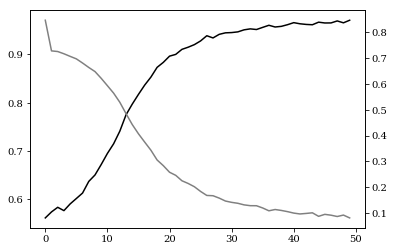

In [12]:
import os

###
# 5.学習の可視化
###

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')
#file,ext = os.path.splitext(os.path.basename(__file__))
#plt.savefig(file+'.eps')

plt.show()